In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from PIL import Image
import timeit

import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE ## tf.data transformation parameters

from sklearn.model_selection import train_test_split

In [3]:
#matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
    'sans-serif' : 'Georgia'}
        #'weight' : 'bold'}
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (16,8)

S = 15
M = 18
B = 28

lw =5

plt.rc('font', size      = S)          # controls default text sizes
plt.rc('axes', titlesize = B)     # fontsize of the axes title
plt.rc('axes', labelsize = M)    # fontsize of the x and y labels
plt.rc('xtick', labelsize= S)    # fontsize of the tick labels
plt.rc('ytick', labelsize= S)    # fontsize of the tick labels
plt.rc('legend', fontsize= M)    # legend fontsize
plt.rc('figure', titlesize=B)  # fontsize of the figure title

# linewidth

L = 6

# Colors

C1 = '#144974' #(20,73,116)
C2 = '#0070C0'
C3 = '#A0A0A0'

dash = '--'

# legend locations
ul = 'upper left'
ur = 'upper right'

# plot layout

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# grid

plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5


# Test plot

# plt.plot(np.arange(1,100,1),np.arange(1,100,1), label='Label')
# plt.xlabel('X Label')
# plt.ylabel('Y Label')
# plt.title('Title')
# plt.legend(loc='upper left')
# plt.show()

# Imports

In [3]:
def jpg_image_to_array(image_path):
  """
  Loads JPEG image into 3D Numpy array of shape 
  (width, height, channels)
  """
  with Image.open(image_path) as image:         
    im_arr = np.fromstring(image.tobytes(), dtype=np.uint8)
    im_arr = im_arr.reshape((image.size[1], image.size[0], 3))                                   
    return im_arr

In [ ]:
# The number of celeb images: 2052599
n_celeb_images = 20000
# The format specification here left pads zeros on the number: 000006.
celeb_filenames = ['data/img_align_celeba/{:06d}.jpg'.format(i)
                    for i in range(1, n_celeb_images + 1)]
## slicing the array of strings, resulting in a set of scalar binary-strings
# path_ds = tf.data.Dataset.from_tensor_slices(celeb_filenames)

In [ ]:
%%time
full_images=[]
for i in celeb_filenames:
    full_images.append(jpg_image_to_array(i))

In [4]:
df_labels = pd.read_csv('data/list_attr_celeba.csv')

In [5]:
df_labels.columns = map(str.lower, df_labels.columns)
df_labels.replace([-1], 0, inplace=True)

In [6]:
df_labels.head()

,image_id,5_o_clock_shadow,arched_eyebrows,attractive,bags_under_eyes,bald,bangs,big_lips,big_nose,black_hair,...,sideburns,smiling,straight_hair,wavy_hair,wearing_earrings,wearing_hat,wearing_lipstick,wearing_necklace,wearing_necktie,young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


## Functions

In [ ]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [218, 178])
    image /= 255.0  # normalize to [0,1] range
    return image

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

In [ ]:
## create a new dataset that loads and formats images on the fly
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

plt.figure(figsize = (8,8))
for n, image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

In [ ]:
print(image_ds)

In [ ]:
for n, image in enumerate(image_ds.take(20)):
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

# Covnet Tensorflow

In [ ]:
train_images=full_images[:90]
train_images = np.asarray(train_images)
train_labels=df_labels.male[:90]
train_labels = np.asarray(train_labels)

test_images=full_images[90:100]
test_images = np.asarray(test_images)
test_labels=df_labels.male[90:100]
test_labels = np.asarray(test_labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(full_images), np.asarray(df_labels.male)[:20000], shuffle=False)

In [ ]:
X_train[0]

## First Layer

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (5, 5), activation='relu',
                        input_shape=(218, 178, 3), padding = "same"),
    keras.layers.MaxPooling2D((2, 2))
])

In [ ]:
model.summary()

## Second Layer

In [ ]:
model.add(keras.layers.Conv2D(32, (5, 5), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPool2D(2,2))

In [ ]:
model.summary()

## Third Layer

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = "relu"))

In [ ]:
model.add(keras.layers.Dense(2,  activation = "softmax"))

In [ ]:
model.summary()

## Train the Network

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X_train

In [ ]:
%%time
X_train_images = X_train.reshape((X_train.shape[0], 218, 178, 3))
model.fit(X_train_images, y_train, epochs=1, verbose=2)

In [ ]:
%%time
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('\nTest accuracy {:5.2f}%'.format(100*test_acc))

## Save the model

## Plotting the Weights

In [ ]:
def plot_digit_weights(ax, digit):
    """Plot the weights from our fit fully connected network as an image."""
    digit_weigths = np.reshape(model.weights[0][:,digit], (218,178))
    ax.imshow(digit_weigths, cmap=plt.cm.winter, interpolation="nearest")    

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for digit, ax in enumerate(axs.flatten()):
    plot_digit_weights(ax, digit)

remove_grid_lines(axs)
fig.suptitle("Fitted FC-weights plotted as an image")
plt.tight_layout()

# Feature Importance Based on RF / GB

In [ ]:
# saved_model_path = "saved_models/gender_20191105.h5"
# model = keras.models.load_model(saved_model_path)

In [15]:
from src.modeling import ModelAll, get_and_clean_data

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [16]:
%%time
df = get_and_clean_data()

CPU times: user 692 ms, sys: 98.4 ms, total: 791 ms
Wall time: 796 ms


In [17]:
%%time
X_train, X_test, y_train, y_test = train_test_split(df.drop(['male', 'image_id'], axis=1), df.male)

CPU times: user 95.7 ms, sys: 47.3 ms, total: 143 ms
Wall time: 143 ms


In [4]:
# %%time
# test.run_it()

In [21]:
def mental_beak_down(mod):
    model = mod(verbose=1)
    model.fit(X_train, y_train)
    feat_scores = pd.DataFrame({'Fraction of Samples Affected' : model.feature_importances_},
                           index=df.drop(['male', 'image_id'], axis=1).columns)
    feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
    feat_scores.plot(kind='barh', figsize = (12,8))
    plt.title('Important Features to Determine Gender')
    plt.ylim(29,39);
    return model.score(X_test, y_test)

def run_it():
    model_list = [RandomForestClassifier, GradientBoostingClassifier]
    for i in model_list:
        print (mental_beak_down(i))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


0.9302073050345508
      Iter       Train Loss   Remaining Time 
         1           1.2245           25.26s
         2           1.1152           25.17s
         3           1.0246           24.06s
         4           0.9484           23.28s
         5           0.8825           23.29s
         6           0.8267           22.64s
         7           0.7771           22.25s
         8           0.7354           21.71s
         9           0.6970           21.54s
        10           0.6655           21.11s
        20           0.4790           18.24s
        30           0.4001           15.67s
        40           0.3580           13.34s
        50           0.3343           10.87s
        60           0.3189            8.62s
        70           0.3093            6.42s
        80           0.3021            4.26s
        90           0.2971            2.13s
       100           0.2934            0.00s
0.9329121421520237
CPU times: user 1min 19s, sys: 984 ms, total: 1min 20s
Wall t

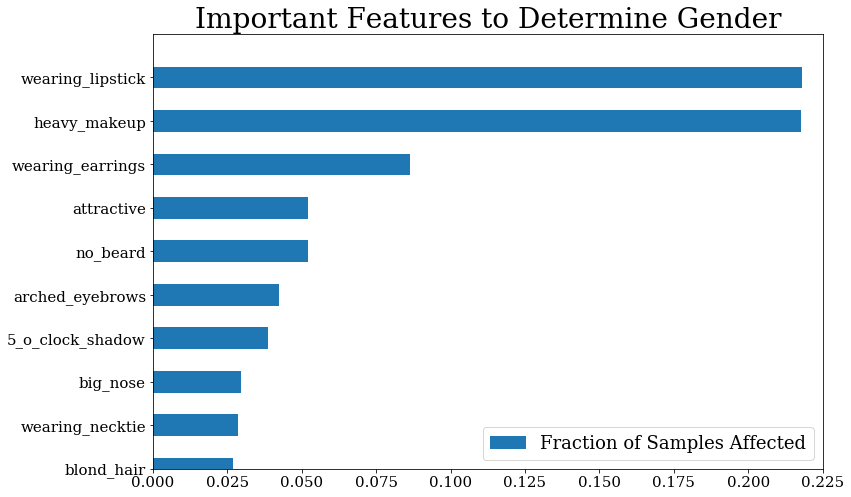

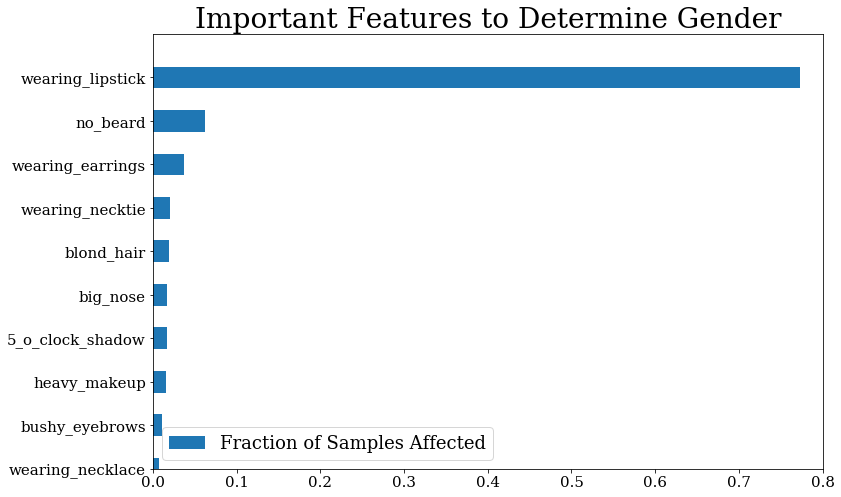

In [22]:
%%time
run_it()

### Of the males, what determines attractiveness?

In [27]:
def mental_beak_down_male(mod):
    model = mod(verbose=1)
    model.fit(X_train, y_train)
    feat_scores = pd.DataFrame({'Fraction of Samples Affected' : model.feature_importances_},
                           index=male_df.drop(['male', 'image_id', 'attractive'], axis=1).columns)
    feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
    feat_scores.plot(kind='barh', figsize = (12,8))
    plt.title('Important Features to Determine Male Attraction')
    plt.ylim(30,38);
    return model.score(X_test, y_test)

def run_it():
    model_list = [RandomForestClassifier, GradientBoostingClassifier]
    for i in model_list:
        print (mental_beak_down_male(i))

In [28]:
male_df = df[df.male==1]
female_df = df[df.male==0]

In [29]:
%%time
X_train, X_test, y_train, y_test = train_test_split(male_df.drop(['male', 'image_id', 'attractive'], axis=1), male_df.attractive)

CPU times: user 32 ms, sys: 7.18 ms, total: 39.2 ms
Wall time: 37.6 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


0.7635131934246057
      Iter       Train Loss   Remaining Time 
         1           1.1503            8.92s
         2           1.1227           10.59s
         3           1.0969           11.53s
         4           1.0765           11.11s
         5           1.0589           10.45s
         6           1.0422           10.03s
         7           1.0291            9.55s
         8           1.0174            9.23s
         9           1.0069            9.09s
        10           0.9976            8.94s
        20           0.9392            6.84s
        30           0.9063            5.67s
        40           0.8861            4.74s
        50           0.8724            3.80s
        60           0.8624            2.98s
        70           0.8556            2.21s
        80           0.8506            1.45s
        90           0.8469            0.72s
       100           0.8439            0.00s
0.7862523094414705
CPU times: user 8.66 s, sys: 199 ms, total: 8.86 s
Wall time:

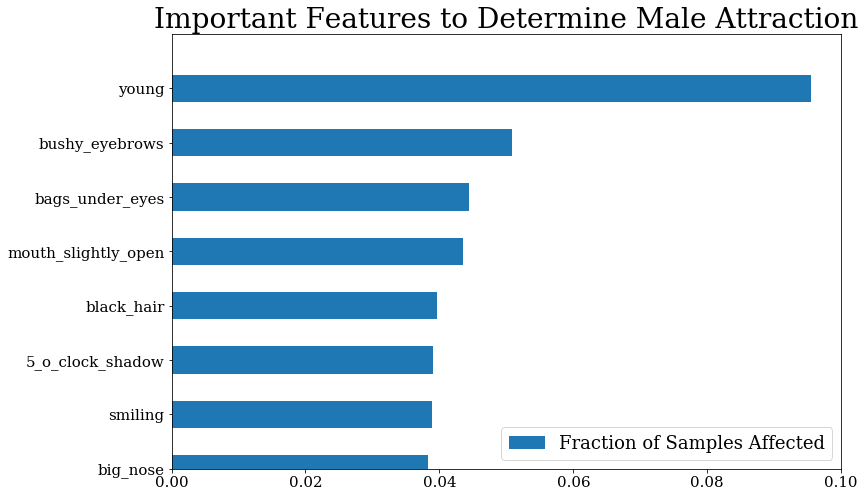

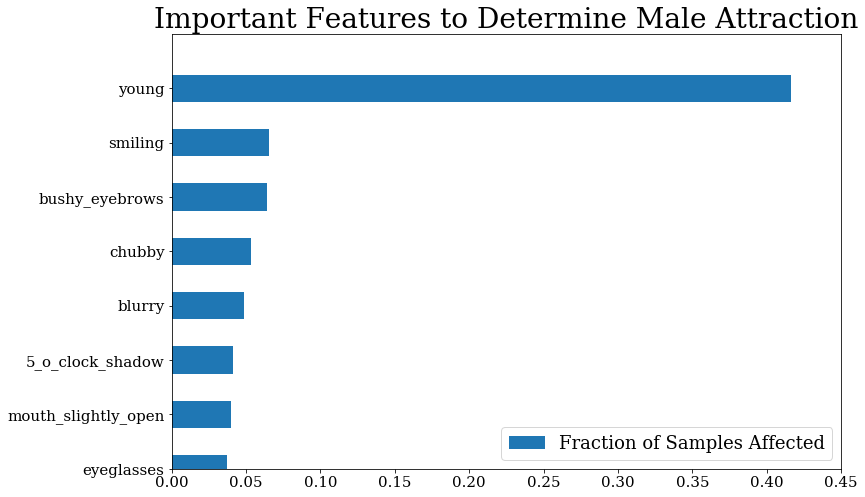

In [30]:
%%time
run_it()

### Of the females, what determines attractiveness?

In [128]:
def mental_beak_down_female(mod):
    model = mod(verbose=1)
    model.fit(X_train, y_train)
    feat_scores = pd.DataFrame({'Fraction of Samples Affected' : model.feature_importances_},
                           index=female_df.drop(['male', 'image_id', 'attractive'], axis=1).columns)
    feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
    feat_scores.plot(kind='barh', figsize = (12,8))
    plt.title('Important Features to Determine Female Attraction')
    plt.ylim(30,39);
    return model.score(X_test, y_test)

def run_it():
    model_list = [RandomForestClassifier, GradientBoostingClassifier]
    for i in model_list:
        print (mental_beak_down_female(i))

In [132]:
%%time
X_train, X_test, y_train, y_test = train_test_split(female_df.drop(['male', 'image_id', 'attractive'], axis=1), female_df.attractive)

CPU times: user 59.4 ms, sys: 24.4 ms, total: 83.7 ms
Wall time: 83.9 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


0.7596642068918827
      Iter       Train Loss   Remaining Time 
         1           1.2027           13.74s
         2           1.1641           13.29s
         3           1.1326           12.48s
         4           1.1072           11.96s
         5           1.0860           12.25s
         6           1.0686           11.90s
         7           1.0539           11.56s
         8           1.0407           11.24s
         9           1.0296           10.96s
        10           1.0196           10.73s
        20           0.9645            9.14s
        30           0.9391            7.74s
        40           0.9226            6.46s
        50           0.9106            5.33s
        60           0.9030            4.26s
        70           0.8974            3.14s
        80           0.8932            2.07s
        90           0.8898            1.08s
       100           0.8875            0.00s
0.7899600568681877
CPU times: user 13.1 s, sys: 303 ms, total: 13.4 s
Wall time:

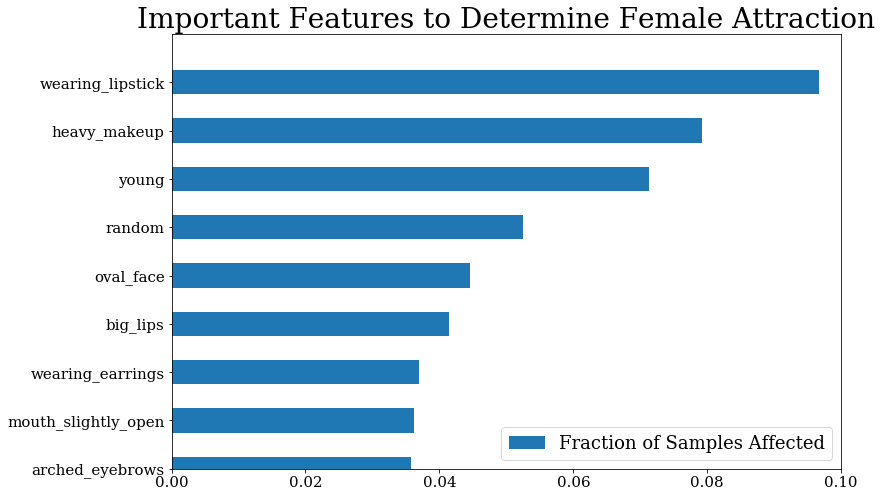

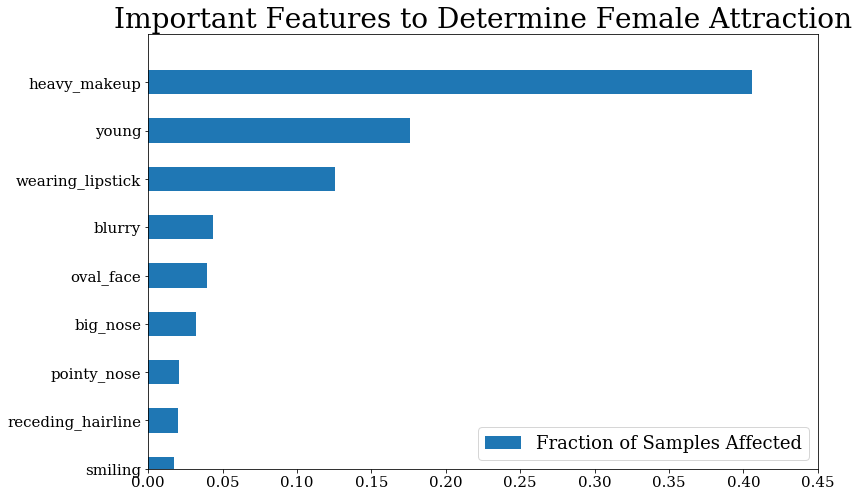

In [133]:
%%time
run_it()

In [123]:
female_df['random'] = np.random.choice(2, 118165)

In [127]:
female_df.head()

,image_id,5_o_clock_shadow,arched_eyebrows,attractive,bags_under_eyes,bald,bangs,big_lips,big_nose,black_hair,...,smiling,straight_hair,wavy_hair,wearing_earrings,wearing_hat,wearing_lipstick,wearing_necklace,wearing_necktie,young,random
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,1,0
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,1,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
5,000006.jpg,0,1,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,1


# Getting ready

In [4]:
from src.cnn_gender import get_and_clean_data
import cv2

In [7]:
def get_images():
    full_images, df = get_and_clean_data()
    img_list = np.asarray(full_images[:10000])
    img_list.shape
    temp=[]
    for i in img_list:
        temp.append(cv2.resize(i, (200,200)))
    X_train, X_test, y_train, y_test = train_test_split(np.asarray(temp),
                                                       df.male[:10000] ,shuffle=False)
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255    
    return X_train, X_test, y_train, y_test, df[:10000]

In [ ]:
X_train, X_test, y_train, y_test, df = get_images()

In [ ]:
X_train.shape

In [ ]:
# split by male and female
df[df.male=1]